In [1]:
#### REMEMBER TO GIT PULL!  ####
#### Add this block to all jupyter files ####

#Loading and importing necessary tools. 
%load_ext autoreload 
%autoreload 2
import sys, os
sys.path.append("scripts")
import load_params as LP

# Comment and uncomment these two lines for when you are working on this notebook. 
#param_file = "param_files/ryo_local.csv"
param_file = "param_files/binkley_local.csv" 

paramDict = LP.load_param_file(param_file)

In [3]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
import sys
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import sys
import codecs
 

from random import sample

import seaborn as sns
sns.set_style('whitegrid')

# guarantee unicode string
_u = lambda t: t.decode('UTF-8', 'replace') if isinstance(t, str) else t
_uu = lambda *tt: tuple(_u(t) for t in tt) 
# guarantee byte string in UTF8 encoding
_u8 = lambda t: t.encode('UTF-8', 'replace') if isinstance(t, unicode) else t
_uu8 = lambda *tt: tuple(_u8(t) for t in tt) 





In [4]:
#####This will be the iterative step, run this for a given eQTL, you pick the best GWAS and run it for H0

In [5]:
###Leave more blank space

In [6]:
# import custom functions
import deprecated_funcs as DF


In [7]:
# Potentially deprecated functions. 
# import custom functions
import deprecated_funcs as DF
#param_file = "param_files/ryo_local.csv"
param_file = "param_files/binkley_local.csv" 

paramDict = LP.load_param_file(param_file)

DF.output_coldspot('coldspotlist.txt', paramDict)
DF.extract_best_eqtl(paramDict)

In [8]:
#### This step outputs the cold spots and returns the list 

def ID_hotspots(outfilename): 
    fileIN = open(paramDict["gtexDir"] + 'coldspots.txt')
    hotspots = list()
    fileOUT = open(outfilename, "w")
    for i in fileIN: 
        i = i.rstrip().split('\t')

        
        Chr = i[0]
        for num in i[0]: #Get rid of "chr in the file"
            if num in "chr":
                Chr = Chr.replace(num, '')       
        start = int(i[1])
        end = int(i[2])
        middle = str(i[3])
        bound = str (i[4])
        hotspots.append([Chr, start, end, middle, bound])
        #hotspots.append(start)
        #hotspots.append(end)
        #hotspots.append(middle)
        fileOUT.write(Chr + "\t" + str(start) + "\t" + str(end) + "\t" + str(middle)  +  "\t" + str(bound) + "\n")
    fileIN.close()
    fileOUT.close()
    return hotspots
ID_hotspots('coldspots2.txt')



[['1', 1020078, 1031078, '1025578', '1872839'],
 ['1', 1872839, 1881839, '1877339', '2031839'],
 ['1', 2031839, 2035839, '2033839', '2141839'],
 ['1', 2141839, 2147839, '2144839', '2214839'],
 ['1', 2214839, 2221839, '2218339', '2299839'],
 ['1', 2299839, 2303839, '2301839', '2322839'],
 ['1', 2322839, 2326839, '2324839', '2338839'],
 ['1', 2338839, 2357839, '2348339', '2362839'],
 ['1', 2362839, 2369839, '2366339', '2403839'],
 ['1', 2403839, 2408839, '2406339', '2747844'],
 ['1', 2747844, 2756844, '2752344', '2798844'],
 ['1', 2798844, 2806844, '2802844', '2877844'],
 ['1', 2877844, 2880844, '2879344', '2894844'],
 ['1', 2894844, 2898844, '2896844', '3004844'],
 ['1', 3004844, 3019844, '3012344', '3054844'],
 ['1', 3054844, 3072844, '3063844', '3108844'],
 ['1', 3108844, 3112844, '3110844', '3112844'],
 ['1', 3112844, 3118844, '3115844', '3148844'],
 ['1', 3148844, 3151844, '3150344', '3163844'],
 ['1', 3163844, 3168844, '3166344', '3263844'],
 ['1', 3263844, 3276844, '3270344', '332

In [9]:
#####OUtputs cold spot for given eqtl
def find_variant_coldspot(outfilename):
    fileIN = open( "/users/michaelbinkley/desktop/RTCstuffs/besteQTLs.txt" )
    
    fileOUT = open(outfilename, "w")
    hspots = ID_hotspots('coldspots2.txt')



    for i in fileIN:
        
        i = i.rstrip().split('\t')
        gene = str(i[0])
        chrnum = str(i[1])
        snp = (i[3])
        position = float(i[2])
        pvalue = float(i[4])
        
        for  Chr, start, (end), middle, (bound) in hspots:
            if Chr  != chrnum :
                continue
            else: 
                if position < float(bound) and position > float(end): 
                    #distance = abs(position - middle)
                    fileOUT.write("\t".join([ str(Chr), str(start), str(end), str(middle), str(bound) , gene, snp, str(position), str(pvalue)] ) + "\n")
                else: 
                    continue
    fileIN.close()
    fileOUT.close()

find_variant_coldspot('eQTLcoldspot.txt')

#### This step can probably be truncated 
def output_selected_coldspots(outfilename):
    fileIN = open ('eQTLcoldspot.txt')
    fileOUT = open(outfilename, "w")
    selectedcoldspots = list()
    
    for i in fileIN:
        
        i = i.rstrip().split('\t')
        Chr = str(i[0])
        end = str(i[2])
        bound = str(i[4])
        
    

        fileOUT.write("\t".join([ str(Chr),  str(end),  str(bound)] ) + "\n")
        selectedcoldspots.append([ str(Chr),  str(end),  str(bound)])                    
    
    fileIN.close()
    fileOUT.close()
    return selectedcoldspots
output_selected_coldspots('selectedcoldspots.txt')




[['22', '40382500', '40525500']]

In [10]:
###THis outputs a file with GWAS variants in our cold spots of interest that colocalize. it will output the best GWAS
def find_variant_coldspot(outfilename):
    fileIN = open(paramDict["gtexDir"] +'/oncoarray_bcac_public_release_oct17.txt')
    fileIN.readline()
    fileOUT = open(outfilename, "w")


    cspots = output_selected_coldspots('selectedcoldspots.txt')

    for i in fileIN:
        
        i = i.rstrip().split('\t')
        gene = str(i[0])
        chrnum = str(i[2])
        #snp = (i[3])
        position = float(i[3])
        pvalue = float(i[9])
        if pvalue<10e-9:
            for  (Chr), (end), (bound) in cspots:
                if Chr  != chrnum:
                    continue
                else: 
                    if position < float(bound) and position > float(end): 
                    #distance = abs(position - middle)
                        fileOUT.write("\t".join([ str(Chr), str(end),  str(bound) , gene, str(position), str(pvalue)] ) + "\n")
                    else: 
                        continue
    fileIN.close()
    fileOUT.close()
find_variant_coldspot("gwasColdSpot.txt")

def sort_combined_gwas(outfilename):
    fileIN = open("gwasColdSpot.txt")
    sortedData = list()
    fileOUT = open(outfilename, "w")
    for i in fileIN:
        i=i.rstrip().split("\t")
        i =[i[0], (i[1]), (i[2]), (i[3]), (i[4]), float(i[5])]
        sortedData.append( [(i[0]), (i[1]), (i[2]), i[3], (i[4]), float(i[5])])
    sortedScoreData = sorted(sortedData, key = lambda x : (x[5]), reverse=False) #Sort by the element in the column index 
    
    for i in sortedScoreData:
        #print(i)
        fileOUT.write("\t".join([str(x) for x in i]) + "\n")
    #return [x[0] for x in sortedScoreData]
    fileOUT.close()
    fileIN.close()
sort_combined_gwas('sortedGWAS.txt')


### This outputs the best GWAS for a given coldspot
def output_header(outfilename):

    fileIN = open('sortedGWAS.txt')
    fileOUT = open(outfilename, "w")

    fileOUT.write(fileIN.readline() + "\n")

output_header("bestGWAS.txt")





In [11]:
#####This step outputs the selected cold spot
def output_selected_coldspots(outfilename):
    fileIN = open ('selectedcoldspots.txt')
    fileOUT = open(outfilename, "w")
    selectedcoldspots2 = list()
    
    for i in fileIN:
        
        i = i.rstrip().split('\t')
        Chr = str(i[0])
        end = float(i[1])
        bound = float(i[2])
        selectedcoldspots2.append([ (Chr),  (end),  (bound)])              
    

        fileOUT.write("\t".join([ str(Chr),  str(end),  str(bound)] ) + "\n")
              
    
    fileIN.close()
    fileOUT.close()
    return selectedcoldspots2
output_selected_coldspots('preVCF.txt')



[['22', 40382500.0, 40525500.0]]

In [12]:
#####This step has many readlines, it outputs all variants in the cold spot

def filter_vcf(outfilename): 
    fileIN = open(paramDict["gtexDir"] +'/chr22_subset_gtex_copy.vcf')
    
    selectedcoldspots2 = output_selected_coldspots('preVCF.txt')
    fileOUT = open(outfilename, "w")
    
    for i in fileIN:
        line= fileIN.readline()
        if line[0]=="#":
            continue
      

        i = i.rstrip().split('\t')
        if i[1]=="POS":
            continue      
        chrnum = str(i[0])
        #print(i[1])
        position = float(i[1])


        for  Chr, end, bound in selectedcoldspots2:
            if (Chr)  == chrnum:
                if position > end  and position < bound:  

                    fileOUT.write("\t".join([str(x) for x in i] ) + "\n")                    
                else: 
                    continue
      
    fileIN.close()
    fileOUT.close()
filter_vcf('filteredgenotype.txt')



In [13]:
######This step randomly picks an eQTL in the coldspot and the position

def select_rand_variant(outfilename, paramDict): 
    fileIN = open('filteredgenotype.txt')
    fileOUT = open(outfilename, "w")
    rnd = list()
    for i in fileIN:

        i = i.rstrip().split('\t')
        rnd.append(i[2])

    rand = sample(rnd[0:],1)

    for i in rand:
        fileOUT.write("\t".join([str(x) for x in rand] ) +  "\n")

    fileOUT.close()
    fileIN.close()
    return rand
select_rand_variant(paramDict["gtexDir"] + "eQTLcausal.txt", paramDict)

def output_pos_rand_variant(outfilename, paramDict): 
    fileIN = open('filteredgenotype.txt')
    fileOUT = open(outfilename, "w")
    sand = open(paramDict["gtexDir"] +  'eQTLcausal.txt')
    for i in sand: 
        i = i.rstrip().split('\t') 
        rand = str(i[0])

    for j in fileIN: 
        j = j.rstrip().split('\t')
        SNP = str(j[2])
        random = str(rand)

        if SNP == random: 

            fileOUT.write(str(j[1]) + "\n")
            break
    fileOUT.close()
    fileIN.close()
output_pos_rand_variant(paramDict["gtexDir"] + "eQTLcausalpos.txt", paramDict)    

In [14]:
#####This step randomly picks a GWAScausal in the coldspot

def select_rand_variant(outfilename): 
    fileIN = open('filteredgenotype.txt')
    fileOUT = open(outfilename, "w")
    rnd = list()
    for i in fileIN:

        i = i.rstrip().split('\t')
        rnd.append(i[2])
    rand = sample(rnd[0:],1)

    for i in rand:
        fileOUT.write("\t".join([str(x) for x in rand] ) +  "\n")
    fileOUT.close()
    fileIN.close()
select_rand_variant(paramDict["gtexDir"] + "GWAScausal.txt")

def output_pos_rand_variant(outfilename, paramDict): 
    fileIN = open('filteredgenotype.txt')
    fileOUT = open(outfilename, "w")
    sand = open(paramDict["gtexDir"] +  'GWAScausal.txt')
    for i in sand: 
        i = i.rstrip().split('\t') 
        rand = str(i[0])

    for j in fileIN: 
        j = j.rstrip().split('\t')
        SNP = str(j[2])
        random = str(rand)

        if SNP == random: 

            fileOUT.write(str(j[1]) + "\n")
            break
    fileOUT.close()
    fileIN.close()
output_pos_rand_variant(paramDict["gtexDir"] + "GWAScausalpos.txt", paramDict)    


In [48]:
import os

os.system("plink --vcf /users/michaelbinkley/desktop/GTEx/chr22_subset_gtex.vcf --show-tags /users/michaelbinkley/desktop/GTEx/eQTLcausal.txt --tag-r2 0.5")

0

In [46]:
import os

os.system("plink --vcf /users/michaelbinkley/desktop/GTEx/chr22_subset_gtex.vcf --show-tags /users/michaelbinkley/desktop/GTEx/GWAScausal.txt --tag-r2 0.5")

0

In [18]:
### This will be the GWAS to run the RTC score 
def select_rand_variant(outfilename): 
    fileIN = open(paramDict["gtexDir"] +  '/plink.tags')
    fileOUT = open(outfilename, "w")
    rnd = list()
    for i in fileIN:

        i = i.rstrip().split('\t')
        rnd.append(i[0])
    rand = sample(rnd[0:],1)

    for i in rand:
        fileOUT.write("\t".join([str(x) for x in rand] ) +  "\n")
    fileOUT.close()
    fileIN.close()
select_rand_variant(paramDict["gtexDir"] + "linkedGWAS.txt")

def output_pos_rand_variant(outfilename, paramDict): 
    fileIN = open('filteredgenotype.txt')
    fileOUT = open(outfilename, "w")
    sand = open(paramDict["gtexDir"] +  'linkedGWAS.txt')
    posI = list()
    for i in sand: 
        i = i.rstrip().split('\t') 
        rand = str(i[0])

    for j in fileIN: 
        j = j.rstrip().split('\t')
        SNP = str(j[2])
        random = str(rand)

        if SNP == random: 

            fileOUT.write(str(j[1]) + "\n")
            posI.append(j[1])
            break
    return posI
    fileOUT.close()
    fileIN.close()
output_pos_rand_variant(paramDict["gtexDir"] + "linkedGWASpos.txt", paramDict)    


def output_gwas(outfilename, paramDict):
    Chr = "22"
    posI = open(paramDict["gtexDir"] + "linkedGWASpos.txt")    

    fileOUT = open(outfilename, "w")
    for i in posI: 
        i = i.rstrip().split('\t') 
        pos = i[0] 

        
        fileOUT.write(str(Chr) + '_' + str(pos) + '\t' + 'Cancer' + '\n')

    fileOUT.close()
    

output_gwas(paramDict["gtexDir"] + 'gwasQTLtools.txt', paramDict)



In [51]:
###This will be the eQTL to run the RTC score 
def select_rand_variant(outfilename): 
    fileIN = open('/users/michaelbinkley/desktop/RTCstuffs/plink.tags')
    fileOUT = open(outfilename, "w")
    rnd = list()
    for i in fileIN:

        i = i.rstrip().split('\t')
        rnd.append(i[0])
    rand = sample(rnd[0:],1)

    for i in rand:
        fileOUT.write("\t".join([str(x) for x in rand] ) +  "\n")
    fileOUT.close()
    fileIN.close()
select_rand_variant(paramDict["gtexDir"] + "linkedeQTL.txt")

def output_pos_rand_variant(outfilename, paramDict): 
    fileIN = open('filteredgenotype.txt')
    fileOUT = open(outfilename, "w")
    sand = open(paramDict["gtexDir"] +  'linkedeQTL.txt')
    posI = list()
    for i in sand: 
        i = i.rstrip().split('\t') 
        rand = str(i[0])

    for j in fileIN: 
        j = j.rstrip().split('\t')
        SNP = str(j[2])
        random = str(rand)

        if SNP == random: 

            fileOUT.write(str(j[1]) + "\n")
            posI.append(j[1])
            break
    return posI
    fileOUT.close()
    fileIN.close()
output_pos_rand_variant(paramDict["gtexDir"] + "linkedeQTLpos.txt", paramDict)    


def output_gwas(outfilename, paramDict):
    Chr = "22"
    posI = open(paramDict["gtexDir"] + "linkedeQTLpos.txt")    

    fileOUT = open(outfilename, "w")
    for i in posI: 
        i = i.rstrip().split('\t') 
        pos = i[0] 

        
        fileOUT.write(str(Chr) + '_' + str(pos) + '\t' + 'Cancer' + '\n')

    fileOUT.close()
    

output_gwas(paramDict["gtexDir"] + 'eQTLQTLtools.txt', paramDict)





In [52]:
### RUn this for the real eQTL
import load_params as LP
import eqtl_funcs as EF

geneName = "ENSG00000172404.4"
chrNum = "22"
pos = "40407887"
tissue = "Breast_Mammary_Tissue"
#22_40407887_G_A_b37

slope, intercept,  residuals, indivVector = EF.get_eqtl_stats(chrNum, pos, geneName, tissue, paramDict)  

print(slope)
print(intercept)
print(residuals)



	Getting dosage vector for : 22 40407887 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok
dosage: [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [53]:


def calculate_pp(slope_r, intercept, residuals, chrNum, pos, indivVector, paramDict):
    '''
    Calculates pseudophenotype for SNP at chrnum and pos, given slope,intersect, residuals. 
    IndivVector - ensures that the we are using the same individuals for this calculation as when the slope, intercept, and residuals were calculated.
    
    '''
    permutedResiduals = random.sample(list(residuals), len(residuals))
    genoVector, indivGenoVector = GF.get_dos_vector(chrNum, pos, paramDict["vcfDir"])
    print("Genovector Length", len(genoVector))
    print(len(indivGenoVector))
    print(len(indivVector))
    filteredGenoVector, indivVector = GF.filter_and_sort_genotype_vector(genoVector, indivGenoVector, indivVector)
    pp = float(slope_r)*np.array(filteredGenoVector) + permutedResiduals + intercept   
    return pp



In [54]:
### run this for the simulated, use the position from the rand_linked functions
import eqtl_funcs as EF
import gtex_funcs as GF
import random
random.seed(0)

param_file = "param_files/binkley_local.csv" 

paramDict = LP.load_param_file(param_file)

geneName = "ENSG00000172404.4"
chrNum = "22"
pos = "40407887"
tissue = "Breast_Mammary_Tissue"

print(pos)
slope_r, intercept,  residuals, indivVector = EF.get_eqtl_stats(chrNum, pos, geneName, tissue, paramDict)  


chrNumLinked = "22"
### THIS is the position of the randomly selected
posLinked = output_pos_rand_variant(paramDict["gtexDir"] + "linkedeQTLpos.txt", paramDict)   

print("position", posLinked, posLinked[0])
posLinked = posLinked[0]

pp = calculate_pp(slope_r, intercept, residuals, chrNumLinked, posLinked, indivVector, paramDict)


40407887
	Getting dosage vector for : 22 40407887 /Users/michaelbinkley/Desktop/GTEx/
	Getting header
	Stillok
dosage: [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [55]:


def output_gene_info(geneName, paramDict):
    
    fileIN = open(paramDict["tmpDir"] + '/chrname2.txt')
    selected = list()
    for i in fileIN: 
        i = i.rstrip().split('\t')
        
        if i[3]== geneName:
            selected = i
            break
            
    return selected

  
def output_header(indVector): 

            
            
    header = "\t".join(['#chr',  'start', 'end' , 'gene' , 'length' , 'strand'] + [str(x) for x in indVector] )
    return header

    fileIN.close()

def output_bed(indivVector, expVector, filepath, geneName, paramDict):
    selected = output_gene_info(geneName, paramDict)
    header = output_header(indivVector)
    with open(filepath, 'w') as outfile:
        outfile.write(header + "\n")
        geneLocation = selected
        outfile.write("\t".join([str(x) for x in geneLocation]) + "\t" + "\t".join([str(x) for x in expVector]) + "\n")
print(geneName)        
output_bed(indivVector, pp, paramDict["tmpSmall"] + "/GTExExpfile.bed", geneName, paramDict)






ENSG00000172404.4


In [58]:

##not sure we even need to index the PP file

import os

os.system("bgzip /users/michaelbinkley/desktop/RTCstuffs/tmpsmall/GTExExpfile.bed")
os.system("tabix -p bed /users/michaelbinkley/desktop/RTCstuffs/tmpsmall/GTExExpfile.bed.gz")


0

In [59]:
#### Calc RTC score has all correct files

import os


os.system("QTLtools rtc --vcf /users/michaelbinkley/desktop/GTEx/chr22_subset_gtex.vcf.gz --bed /users/michaelbinkley/desktop/RTCstuffs/tmpsmall/GTExExpfile.bed.gz --hotspot /users/michaelbinkley/desktop/qtltools_test/hotspots_b37_hg19.bed --gwas-cis /users/michaelbinkley/desktop/GTEx/eQTLQTLtools.txt /users/michaelbinkley/desktop/qtltools_test/permutations_test.txt --normal --out rtc_results.txt")



0

In [1]:
#### For a given eQTL (the best eqtl for a given gene) run simulation with the most sign gwas hit in coldspot
#### TRIAL 1 - use the best overall eQTL within any coldspot for a given gene

In [6]:
# This outputs the GWAS file in the format for QTLtools

def output_gwas(outfilename):
    fileIN = open(paramDict["gtexDir"] +'/oncoarray_bcac_public_release_oct17.txt')
    fileIN.readline()
    fileOUT = open(outfilename, "w")
    for i in fileIN: 
        i = i.rstrip().split('\t')
        Chr = i[2] 
        Pos = i[3]
        fileOUT.write(str(Chr) + '_' + str(Pos) + '\t' + 'Cancer' + '\n')
output_gwas(paramDict["gtexDir"] + 'gwasQTLtools.txt')


In [35]:
dframe3 = pd.read_csv("/users/michaelbinkley/desktop/qtltools_test/rtc_results.txt", sep =' ',header=(0))
#dframe3 = pd.read_csv("/users/michaelbinkley/desktop/qtltools_test/rtc_results.txt", sep="\t", encoding="utf8")


In [36]:
dframe3.head()

other_variant  our_variant           phenotype     phenotype_group  \
0   22_17597462  22_17620429   ENSG00000069998.8   ENSG00000069998.8   
1   22_17597462  22_17587975   ENSG00000183307.3   ENSG00000183307.3   
2   22_18283247  22_18261544   ENSG00000269220.1   ENSG00000269220.1   
3   22_18439958  22_18483388  ENSG00000093100.13  ENSG00000093100.13   
4   22_18448113  22_18483388  ENSG00000093100.13  ENSG00000093100.13   

  other_variant_chr  other_variant_start  other_variant_rank our_variant_chr  \
0             chr22             17597462                   0           chr22   
1             chr22             17597462                   0           chr22   
2             chr22             18283247                   0           chr22   
3             chr22             18439958                   0           chr22   
4             chr22             18448113                   0           chr22   

   our_variant_start  our_variant_rank    ...    distance_between_variants  \
0           17620429                 0    ...                        22967   
1           17587975                 0    ...                         9487   
2           18261544                 0    ...                        21703   
3           18483388                 0    ...                        43430   
4           18483388                 0    ...                        35275   

   distance_between_other_variant_and_pheno  other_variant_region_index  \
0                                     48715                       64959   
1                                      4795                       64959   
2                                     23159                       64978   
3                                    145695                       64987   
4                                    153850                       64987   

   our_variant_region_index  region_start  region_end  \
0                     64959      17583447    17666446   
1                     64959      17583447    17666446   
2                     64978      18251447    18283446   
3                     64987      18382447    18485446   
4                     64987      18382447    18485446   

   variant_count_in_region       RTC  D'       r^2  
0                      300  0.993333 NaN  0.285641  
1                      300  0.080000 NaN  0.042372  
2                       48  0.562500 NaN  0.002366  
3                      325  0.480000 NaN  0.236648  
4                      325  0.480000 NaN  0.236648  

[5 rows x 22 columns]

(array([ 11.,   7.,   5.,   7.,   5.,   6.,   4.,   7.,   7.,   6.,   2.,
          4.,   6.,   4.,   3.,   0.,   2.,   4.,   4.,   1.,   6.,  11.,
          7.,   3.,   8.,   3.,   4.,   6.,   3.,   3.,   6.,   3.,   6.,
          2.,   3.,   4.,   3.,  12.,   2.,   4.,   2.,   4.,   3.,   3.,
          8.,   8.,   7.,   5.,  10.,   6.,   2.,   5.,   1.,   7.,   6.,
          5.,   9.,   4.,   3.,   6.,   8.,   3.,   3.,   5.,   4.,   3.,
          4.,   6.,  10.,   6.,   9.,   7.,   7.,   1.,   3.,   9.,   4.,
          5.,   4.,   6.,   8.,   7.,   9.,   4.,   6.,  10.,   3.,   6.,
          3.,   2.,  11.,   3.,   6.,  10.,   5.,   6.,   9.,  11.,   7.,
          8.]),
 array([ 0.00108814,  0.01107726,  0.02106638,  0.0310555 ,  0.04104461,
         0.05103373,  0.06102285,  0.07101197,  0.08100109,  0.09099021,
         0.10097933,  0.11096844,  0.12095756,  0.13094668,  0.1409358 ,
         0.15092492,  0.16091404,  0.17090316,  0.18089227,  0.19088139,
         0.20087051,  0.21

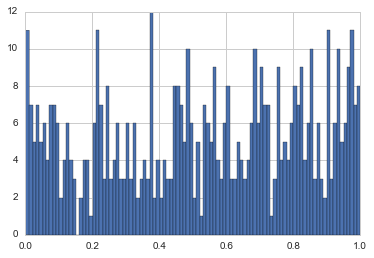

In [39]:
plt.hist(dframe3.RTC,bins=100)

In [49]:
fileIN = open("/users/michaelbinkley/desktop/RTCstuffs/plink.tags")


print(fileIN.readline())

22_40429498_T_C_b37

